In [1]:
import torch as tr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
tr.__version__

'2.0.0'

**Initialization**

In [3]:
x = tr.empty(3,5)
print(x, x.dtype)

tensor([[-4.6456e+36,  4.5057e-41, -4.6456e+36,  4.5057e-41,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]]) torch.float32


In [4]:
x = tr.randn(3,5)
print(x, x.dtype, x.size(), x.ndim) ### Try x.size instead of x.size()

tensor([[-0.2591, -1.1845, -0.1609,  0.3169,  0.3200],
        [ 0.6061,  0.2578, -1.3171, -0.0648,  0.7650],
        [ 0.8979, -0.3222,  0.8741, -0.3836, -0.4792]]) torch.float32 torch.Size([3, 5]) 2


In [5]:
x.size()==(3,5), x.size()[0]

(True, 3)

**Linking Torch's Tensor with Numpy**

In [6]:
y = x.numpy()
print(y, x.dtype, y.dtype)

[[-0.25914267 -1.1844988  -0.16094549  0.31693587  0.32004854]
 [ 0.6060782   0.25783896 -1.3171242  -0.06476033  0.7650403 ]
 [ 0.8979232  -0.3221707   0.8740658  -0.3835973  -0.47920775]] torch.float32 float32


In [7]:
a = np.ones(5)
b = tr.from_numpy(a)
print(a.dtype, b, b.dtype)

float64 tensor([1., 1., 1., 1., 1.], dtype=torch.float64) torch.float64


In [8]:
c = b.long()
print(c, c.size(), c.dtype)

tensor([1, 1, 1, 1, 1]) torch.Size([5]) torch.int64


In [9]:
xr = tr.randn(3,5)
print(xr.dtype, xr)

torch.float32 tensor([[ 0.9189, -1.3836, -1.0831, -0.4382,  1.1416],
        [ 0.2086, -1.0757, -0.5857,  0.8876, -0.3710],
        [ 0.8232,  0.7161, -0.3150,  0.2464, -0.7146]])


In [10]:
resb = xr + b
print(resb, resb.dtype, resb.size(), b.size())

tensor([[ 1.9189, -0.3836, -0.0831,  0.5618,  2.1416],
        [ 1.2086, -0.0757,  0.4143,  1.8876,  0.6290],
        [ 1.8232,  1.7161,  0.6850,  1.2464,  0.2854]], dtype=torch.float64) torch.float64 torch.Size([3, 5]) torch.Size([5])


In [11]:
resc = xr + c
resc, resc.size(), resc.dtype

(tensor([[ 1.9189, -0.3836, -0.0831,  0.5618,  2.1416],
         [ 1.2086, -0.0757,  0.4143,  1.8876,  0.6290],
         [ 1.8232,  1.7161,  0.6850,  1.2464,  0.2854]]),
 torch.Size([3, 5]),
 torch.float32)

In [12]:
resb == resc ## Saw the difference refer to the dtype of a, b and c

tensor([[ True,  True,  True, False,  True],
        [ True,  True,  True, False,  True],
        [ True, False,  True, False,  True]])

In [13]:
tr.set_printoptions(precision=10)

In [14]:
resb[0,1], resc[0,1], resc[0,1].dtype

(tensor(-0.3836188316, dtype=torch.float64),
 tensor(-0.3836188316),
 torch.float32)

In [15]:
xr[0,1]

tensor(-1.3836188316)

In [16]:
tr.set_printoptions(precision=4)

**Broadcasting!!!**

In [17]:
A = tr.tensor([[1.],[2.],[3.],[4.]])
print(A, A.size())
B = tr.tensor([[5., -5., 5., -5., 5.]])
print(B, B.size())

tensor([[1.],
        [2.],
        [3.],
        [4.]]) torch.Size([4, 1])
tensor([[ 5., -5.,  5., -5.,  5.]]) torch.Size([1, 5])


In [18]:
C = A + B ## A->[4,1] => [4,5] and B->[1,5] => [4,5]
C, C.size()

(tensor([[ 6., -4.,  6., -4.,  6.],
         [ 7., -3.,  7., -3.,  7.],
         [ 8., -2.,  8., -2.,  8.],
         [ 9., -1.,  9., -1.,  9.]]),
 torch.Size([4, 5]))

***In place Modification***

In [19]:
x, xr, x.size()==xr.size()

(tensor([[-0.2591, -1.1845, -0.1609,  0.3169,  0.3200],
         [ 0.6061,  0.2578, -1.3171, -0.0648,  0.7650],
         [ 0.8979, -0.3222,  0.8741, -0.3836, -0.4792]]),
 tensor([[ 0.9189, -1.3836, -1.0831, -0.4382,  1.1416],
         [ 0.2086, -1.0757, -0.5857,  0.8876, -0.3710],
         [ 0.8232,  0.7161, -0.3150,  0.2464, -0.7146]]),
 True)

In [20]:
tr.set_printoptions(precision=5)
print(x+xr)


tensor([[ 0.65979, -2.56812, -1.24408, -0.12125,  1.46162],
        [ 0.81467, -0.81791, -1.90283,  0.82286,  0.39405],
        [ 1.72112,  0.39392,  0.55905, -0.13723, -1.19378]])


In [21]:
x.add_(xr) 
x

tensor([[ 0.65979, -2.56812, -1.24408, -0.12125,  1.46162],
        [ 0.81467, -0.81791, -1.90283,  0.82286,  0.39405],
        [ 1.72112,  0.39392,  0.55905, -0.13723, -1.19378]])

In [22]:
print(x.t())
x.t()  ## you can also take transpose by simply using --> x.T

tensor([[ 0.65979,  0.81467,  1.72112],
        [-2.56812, -0.81791,  0.39392],
        [-1.24408, -1.90283,  0.55905],
        [-0.12125,  0.82286, -0.13723],
        [ 1.46162,  0.39405, -1.19378]])


tensor([[ 0.65979,  0.81467,  1.72112],
        [-2.56812, -0.81791,  0.39392],
        [-1.24408, -1.90283,  0.55905],
        [-0.12125,  0.82286, -0.13723],
        [ 1.46162,  0.39405, -1.19378]])

In [23]:
x.t_()
x ## See it finally affected the original var, SO BE CAREFULL!!!!!

tensor([[ 0.65979,  0.81467,  1.72112],
        [-2.56812, -0.81791,  0.39392],
        [-1.24408, -1.90283,  0.55905],
        [-0.12125,  0.82286, -0.13723],
        [ 1.46162,  0.39405, -1.19378]])

In [24]:
## Shared Memory
a = np.ones(5)
b = tr.from_numpy(a)
print(b)


tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [25]:
a[2]=3
print(b) ## Be careful they appeared to be linked

tensor([1., 1., 3., 1., 1.], dtype=torch.float64)


In [26]:
b[2] = 1
a  ## same goes for here 

array([1., 1., 1., 1., 1.])

***CUDA***

In [27]:
tr.cuda.is_available()

True

In [28]:
device = 'cuda' if tr.cuda.is_available() else 'cpu'
device

'cuda'

In [29]:
if tr.cuda.is_available():
    y = tr.ones_like(x, device = device)
    x = x.to(device)
    z = x + y
    print(z, z.type())
    print(z.to("cpu", tr.double)) ## Note the difference between torch.float64 vs torch.cuda.FloatTensor
    

tensor([[ 1.65979,  1.81467,  2.72112],
        [-1.56812,  0.18209,  1.39392],
        [-0.24408, -0.90283,  1.55905],
        [ 0.87875,  1.82286,  0.86277],
        [ 2.46162,  1.39405, -0.19378]], device='cuda:0') torch.cuda.FloatTensor
tensor([[ 1.65979,  1.81467,  2.72112],
        [-1.56812,  0.18209,  1.39392],
        [-0.24408, -0.90283,  1.55905],
        [ 0.87875,  1.82286,  0.86277],
        [ 2.46162,  1.39405, -0.19378]], dtype=torch.float64)


In [30]:
x = tr.randn(1)
x

tensor([-1.46459])

In [31]:
x=x.to(device)

In [32]:
x.device

device(type='cuda', index=0)

In [33]:
x.data

tensor([-1.46459], device='cuda:0')

In [34]:
x = x.data
print(x, x.item(), x.cpu().numpy())

tensor([-1.46459], device='cuda:0') -1.4645897150039673 [-1.4645897]


***CIFAR10 Permute and Narrow***

In [35]:
import torchvision
!mkdir data
%ls

# data_dir = ''

__notebook__.ipynb  data/


In [36]:
data_dir = '/kaggle/working/data'
cifar = torchvision.datasets.CIFAR10(data_dir, train=True, download=True)
cifar.data.shape

100%|██████████| 170498071/170498071 [00:03<00:00, 49684462.53it/s]


Extracting /kaggle/working/data/cifar-10-python.tar.gz to /kaggle/working/data


(50000, 32, 32, 3)

In [37]:
x = tr.from_numpy(cifar.data).permute(0,3,1,2).float()
x = x / 255
print(x.type(), x.size(), x.min().item(), x.max().item())

torch.FloatTensor torch.Size([50000, 3, 32, 32]) 0.0 1.0


In [38]:
x_r = tr.from_numpy(cifar.data).permute(0,3,2,1).float()
x_r /= 255
print(x_r.size())

torch.Size([50000, 3, 32, 32])


In [39]:
x==x_r ## Litmus test, 
## Ideally we should have get all True , but here we're!!!!
## one reason is that, even the dimension seems to be same
## but height and width got interchanged or mismatch
## hence the error


tensor([[[[ True, False, False,  ..., False, False, False],
          [False,  True, False,  ..., False, False, False],
          [False, False,  True,  ..., False, False, False],
          ...,
          [False, False, False,  ...,  True, False, False],
          [False, False, False,  ..., False,  True, False],
          [False, False, False,  ..., False, False,  True]],

         [[ True, False, False,  ..., False, False, False],
          [False,  True, False,  ..., False, False, False],
          [False, False,  True,  ..., False, False, False],
          ...,
          [False, False, False,  ...,  True, False, False],
          [False, False, False,  ..., False,  True, False],
          [False, False, False,  ..., False, False,  True]],

         [[ True, False, False,  ..., False, False, False],
          [False,  True,  True,  ..., False, False, False],
          [False,  True,  True,  ..., False, False, False],
          ...,
          [False, False, False,  ...,  True, False,

In [40]:
x_r1 = tr.from_numpy(cifar.data).permute(0,3,1,2).float()
x_r1 /= 255
x == x_r1 ## See the difference  in this cell and the preceeding one!!!


tensor([[[[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True]],

         [[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True]],

         [[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ...

In [41]:
Y = tr.narrow(x, 0,0,48)
Y.shape

torch.Size([48, 3, 32, 32])

In [42]:
def show(img):
    npimg = img.numpy()
    plt.figure(figsize=(20,10))
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

    

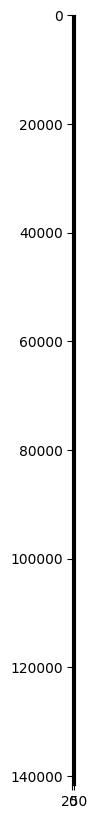

In [43]:
show(torchvision.utils.make_grid(x_r1, nrow = 12))
